In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
traindataset = pd.read_csv("./dataset/train.csv")
testDataset = pd.read_csv("./dataset/test.csv")
tran

In [140]:
totaldataset = pd.concat([dataset,testDataset],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [141]:
totaldataset.isnull().sum()

X1                   0
X2                   0
breed_category    8072
color_type           0
condition         2096
height(cm)           0
issue_date           0
length(m)            0
listing_date         0
pet_category      8072
pet_id               0
dtype: int64

In [142]:
datasetForCondtion = totaldataset.drop(['pet_category','breed_category'],axis=1)

In [143]:
datasetForCondtion.isnull().sum()

X1                 0
X2                 0
color_type         0
condition       2096
height(cm)         0
issue_date         0
length(m)          0
listing_date       0
pet_id             0
dtype: int64

In [146]:
def category_onehot_multcols(multcolumns,totalDataset):
    df_final=totalDataset
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(totalDataset[fields],drop_first=True)
        
        totalDataset.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([totalDataset,df_final],axis=1)
        
    return df_final

In [147]:
datasetForCondtion=category_onehot_multcols(['color_type'],datasetForCondtion)

color_type


In [148]:
test = datasetForCondtion[datasetForCondtion.isnull().values.any(axis=1)]

In [149]:
train = datasetForCondtion.dropna(axis=0)

In [150]:
train.isnull().sum()

X1                0
X2                0
condition         0
height(cm)        0
issue_date        0
                 ..
Tortie Point      0
Tricolor          0
White             0
Yellow            0
Yellow Brindle    0
Length: 63, dtype: int64

In [151]:
X_train = train.drop(['condition'],axis=1)

In [152]:
test.dropna(axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
test

,X1,X2,height(cm),issue_date,length(m),listing_date,pet_id,Apricot,Black,Black Brindle,...,Silver Lynx Point,Silver Tabby,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle
2,15,4,40.90,2014-09-28 00:00:00,0.15,2016-10-19 08:24:00,ANSL_69750,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,11,4,14.00,2018-01-07 00:00:00,0.45,2018-07-28 12:36:00,ANSL_50488,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,13,9,21.90,2018-01-14 00:00:00,0.03,2018-02-11 14:49:00,ANSL_54000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38,0,6,8.22,2017-07-27 00:00:00,0.73,2018-02-18 10:19:00,ANSL_50330,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,9,2,30.40,2017-12-29 00:00:00,0.08,2018-03-08 11:04:00,ANSL_58673,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8007,13,9,8.51,2016-12-20 00:00:00,0.59,2017-01-11 14:19:00,ANSL_57184,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8022,13,9,29.72,2018-07-23 00:00:00,0.11,2018-08-18 12:52:00,ANSL_51474,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8039,15,4,45.12,2016-12-24 00:00:00,0.46,2018-01-15 07:57:00,ANSL_64443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8047,13,9,37.05,2017-08-14 00:00:00,0.90,2017-11-19 19:52:00,ANSL_68768,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
X_train.head()

,X1,X2,height(cm),issue_date,length(m),listing_date,pet_id,Apricot,Black,Black Brindle,...,Silver Lynx Point,Silver Tabby,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle
0,13,9,7.78,2016-07-10 00:00:00,0.80,2016-09-21 16:25:00,ANSL_69903,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,9,14.19,2013-11-21 00:00:00,0.72,2018-12-27 17:47:00,ANSL_66892,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,17.82,2016-12-31 00:00:00,0.62,2019-01-25 18:30:00,ANSL_71623,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,4,11.06,2017-09-28 00:00:00,0.50,2017-11-19 09:38:00,ANSL_57969,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,7,29.56,2017-10-25 00:00:00,0.92,2019-03-10 13:18:00,ANSL_52200,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
X_train.drop(['pet_id','issue_date','listing_date'],axis=1,inplace=True)

In [156]:
X_train

,X1,X2,height(cm),length(m),Apricot,Black,Black Brindle,Black Smoke,Black Tabby,Black Tiger,...,Silver Lynx Point,Silver Tabby,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle
0,13,9,7.78,0.80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,9,14.19,0.72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,17.82,0.62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,4,11.06,0.50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,7,29.56,0.92,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8066,13,9,14.04,0.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8067,13,9,36.08,0.82,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8068,13,9,27.54,0.49,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8069,0,7,37.19,0.98,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
X_train

,X1,X2,height(cm),length(m),Apricot,Black,Black Brindle,Black Smoke,Black Tabby,Black Tiger,...,Silver Lynx Point,Silver Tabby,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle
0,13,9,7.78,0.80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,9,14.19,0.72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,17.82,0.62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,4,11.06,0.50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,7,29.56,0.92,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8066,13,9,14.04,0.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8067,13,9,36.08,0.82,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8068,13,9,27.54,0.49,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8069,0,7,37.19,0.98,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
X_train = np.array(X_train)

In [159]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,:4] = sc.fit_transform(X_train[:, :4])

In [160]:
X_train.shape

(24810, 59)

In [161]:
y_train = train['condition']

In [162]:
y_train = np.array(y_train)

In [163]:
y_train.shape

(24810,)

In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.2, random_state = 0)

## SVM linear classifier

In [165]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear',random_state=0)
svc_classifier.fit(X_train,y_train)
y_pred = svc_classifier.predict(X_test)


In [166]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print("SVM linear classifier accuracy : "+str(accuracy_score(y_test,y_pred)))

[[ 232 1285  285]
 [ 118 1498  334]
 [  46  399  765]]
SVM linear classifier accuracy : 0.5028214429665457


In [167]:
y_pred,y_test

(array([1., 1., 1., ..., 2., 1., 1.]), array([1., 1., 0., ..., 2., 1., 1.]))

In [168]:
svc_kernel =  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)
svc_kernel.fit(X_train,y_train)
y_pred = svc_kernel.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("SVM polly kernel classifier accuracy : "+str(accuracy_score(y_test,y_pred)))

[[ 139 1378  285]
 [   6 1610  334]
 [  13  433  764]]
SVM polly kernel classifier accuracy : 0.5064490124949617


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
Grid = GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
Grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [94]:
print(Grid.best_params_) 
print(Grid.best_estimator_) 
print(Grid.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.5155683192261185


# KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
k_range = list(range(1,100))
model_accuracy = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    model_accuracy[k] = accuracy_score(y_test,y_pred)

0.5096735187424426 is with k =  84


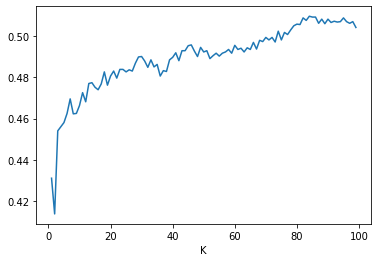

In [96]:
plt.plot(k_range,list(model_accuracy.values()))
plt.xlabel("K")
print(str(max(model_accuracy.values()))+ " is with k =  "+ str(max(model_accuracy,key=model_accuracy.get)))

In [169]:
test

,X1,X2,height(cm),issue_date,length(m),listing_date,pet_id,Apricot,Black,Black Brindle,...,Silver Lynx Point,Silver Tabby,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle
2,15,4,40.90,2014-09-28 00:00:00,0.15,2016-10-19 08:24:00,ANSL_69750,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,11,4,14.00,2018-01-07 00:00:00,0.45,2018-07-28 12:36:00,ANSL_50488,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,13,9,21.90,2018-01-14 00:00:00,0.03,2018-02-11 14:49:00,ANSL_54000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38,0,6,8.22,2017-07-27 00:00:00,0.73,2018-02-18 10:19:00,ANSL_50330,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,9,2,30.40,2017-12-29 00:00:00,0.08,2018-03-08 11:04:00,ANSL_58673,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8007,13,9,8.51,2016-12-20 00:00:00,0.59,2017-01-11 14:19:00,ANSL_57184,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8022,13,9,29.72,2018-07-23 00:00:00,0.11,2018-08-18 12:52:00,ANSL_51474,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8039,15,4,45.12,2016-12-24 00:00:00,0.46,2018-01-15 07:57:00,ANSL_64443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8047,13,9,37.05,2017-08-14 00:00:00,0.90,2017-11-19 19:52:00,ANSL_68768,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
test.drop(['pet_id','issue_date','listing_date'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [178]:
test.shape,X_train.shape

((2096, 59), (19848, 59))

In [172]:
test = np.array(test)

In [173]:
test[:,:4] = sc.transform(test[:, :4])

In [179]:
y_test_pred = svc_kernel.predict(test)

In [180]:
y_test_pred

array([2., 1., 2., ..., 2., 2., 1.])

In [182]:
totaldataset

,X1,X2,breed_category,color_type,condition,height(cm),issue_date,length(m),listing_date,pet_category,pet_id
0,13,9,0.0,Brown Tabby,2.0,7.78,2016-07-10 00:00:00,0.80,2016-09-21 16:25:00,1.0,ANSL_69903
1,13,9,0.0,White,1.0,14.19,2013-11-21 00:00:00,0.72,2018-12-27 17:47:00,2.0,ANSL_66892
2,15,4,2.0,Brown,NaN,40.90,2014-09-28 00:00:00,0.15,2016-10-19 08:24:00,4.0,ANSL_69750
3,0,1,0.0,White,1.0,17.82,2016-12-31 00:00:00,0.62,2019-01-25 18:30:00,2.0,ANSL_71623
4,18,4,0.0,Black,2.0,11.06,2017-09-28 00:00:00,0.50,2017-11-19 09:38:00,1.0,ANSL_57969
...,...,...,...,...,...,...,...,...,...,...,...
8067,13,9,NaN,Brown,2.0,36.08,2016-02-10 00:00:00,0.82,2017-03-10 14:56:00,NaN,ANSL_66809
8068,13,9,NaN,Tan,0.0,27.54,2015-12-07 00:00:00,0.49,2018-02-12 00:00:00,NaN,ANSL_59041
8069,0,7,NaN,Black,0.0,37.19,2015-12-08 00:00:00,0.98,2017-01-04 17:19:00,NaN,ANSL_60034
8070,0,2,NaN,Black,NaN,23.83,2016-06-28 00:00:00,0.79,2017-07-20 18:19:00,NaN,ANSL_58066


In [185]:
totaldataset.loc[totaldataset['condition'].isna(), 'condition'] = y_test_pred

In [186]:
totaldataset

,X1,X2,breed_category,color_type,condition,height(cm),issue_date,length(m),listing_date,pet_category,pet_id
0,13,9,0.0,Brown Tabby,2.0,7.78,2016-07-10 00:00:00,0.80,2016-09-21 16:25:00,1.0,ANSL_69903
1,13,9,0.0,White,1.0,14.19,2013-11-21 00:00:00,0.72,2018-12-27 17:47:00,2.0,ANSL_66892
2,15,4,2.0,Brown,2.0,40.90,2014-09-28 00:00:00,0.15,2016-10-19 08:24:00,4.0,ANSL_69750
3,0,1,0.0,White,1.0,17.82,2016-12-31 00:00:00,0.62,2019-01-25 18:30:00,2.0,ANSL_71623
4,18,4,0.0,Black,2.0,11.06,2017-09-28 00:00:00,0.50,2017-11-19 09:38:00,1.0,ANSL_57969
...,...,...,...,...,...,...,...,...,...,...,...
8067,13,9,NaN,Brown,2.0,36.08,2016-02-10 00:00:00,0.82,2017-03-10 14:56:00,NaN,ANSL_66809
8068,13,9,NaN,Tan,0.0,27.54,2015-12-07 00:00:00,0.49,2018-02-12 00:00:00,NaN,ANSL_59041
8069,0,7,NaN,Black,0.0,37.19,2015-12-08 00:00:00,0.98,2017-01-04 17:19:00,NaN,ANSL_60034
8070,0,2,NaN,Black,1.0,23.83,2016-06-28 00:00:00,0.79,2017-07-20 18:19:00,NaN,ANSL_58066


In [187]:
totaldataset.isnull().sum()

X1                   0
X2                   0
breed_category    8072
color_type           0
condition            0
height(cm)           0
issue_date           0
length(m)            0
listing_date         0
pet_category      8072
pet_id               0
dtype: int64

In [188]:
def category_onehot_multcols(multcolumns,totalDataset):
    df_final=totalDataset
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(totalDataset[fields],drop_first=True)
        
        totalDataset.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([totalDataset,df_final],axis=1)
        
    return df_final

In [189]:
totaldataset=category_onehot_multcols(['color_type'],totaldataset)

color_type


In [190]:
import pickle
pickle.dump(totaldataset,open('./dataset/total_dataset_condition_pred','wb'))
